In [4]:
pip install seaborn

    100% |████████████████████████████████| 286kB 1.5MB/s ta 0:00:01
    100% |████████████████████████████████| 25.9MB 41kB/s  eta 0:00:01
    100% |████████████████████████████████| 9.5MB 124kB/s eta 0:00:01    53% |█████████████████               | 5.1MB 12.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 11.5MB 95kB/s  eta 0:00:01
    100% |████████████████████████████████| 512kB 1.6MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 3.0MB/s eta 0:00:01
    100% |████████████████████████████████| 2.2MB 493kB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 945kB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 3.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-

In [2]:
pip install WordCloud

    100% |████████████████████████████████| 368kB 1.3MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/b6/c0/442d9d87e0da00bf856ef6dd4916f84a2d710b5f1a367d42d7f3c4e99a6c/Pillow-8.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a7/1b/cbd8ae738719b5f41592a12057ef5442e2ed5f5cb5451f8fc7e9f8875a1a/kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658

In [2]:
pip install PCA

  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 81kB 1.4MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c8/89/63171228d5ced148f5ced50305c89e8576ffc695a90b58fe5bb602b910c2/scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c3/e2/00cacecafbab071c787019f00ad84ca3185952f6bb9bca9550ed83870d4d/pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 20.0MB 54kB/s  eta 0:00:01    60% |███████████████████▌            | 12.1MB 9.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c8

In [1]:
ls -l /usr/share/fonts/

total 0
drwxr-xr-x 1 root root 512 Feb  7 14:31 truetype/


In [2]:
ls -l /usr/share/fonts/truetype/

total 0
drwxr-xr-x 1 root root 512 Feb  7 02:42 dejavu/
drwxr-xr-x 1 root root 512 Feb  7 14:31 nanum/


In [3]:
# Import modules
import os
import pickle
import itertools
import numpy as np
import pandas as pd
from collections import Counter

# NLP modules
from konlpy.tag import Mecab, Okt
from khaiii import khaiii

# Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Factor Analysis (PCA)
from sklearn.decomposition import PCA

# Chi square test
from scipy.stats import chi2_contingency

# Visualization setting
sns.set(style="ticks", palette="Set1")
plt.rcParams["font.family"] = 'NanumGothic'

In [4]:
def khaiii_nouns(api, sentence):
    sentence_list = list()
    try:
        for parsed_words in api.analyze(sentence):
            for seg in parsed_words.morphs:
                if seg.tag[0] == 'N':
                    sentence_list.append(seg.lex)
    except:
        sentence_list = list()
    return sentence_list

def khaiii_morphs(api, sentence):
    sentence_list = list()
    try:
        for parsed_words in api.analyze(sentence):
            for seg in parsed_words.morphs:
                sentence_list.append(seg.lex)
    except:
        sentence_list = list()
    return sentence_list

def top_k_words(counter, p):
    top_list = list()
    for k, v in counter.items():
        if v >= np.quantile(list(counter.values()), (1-p)):
            top_list.append((k, v))
    return top_list

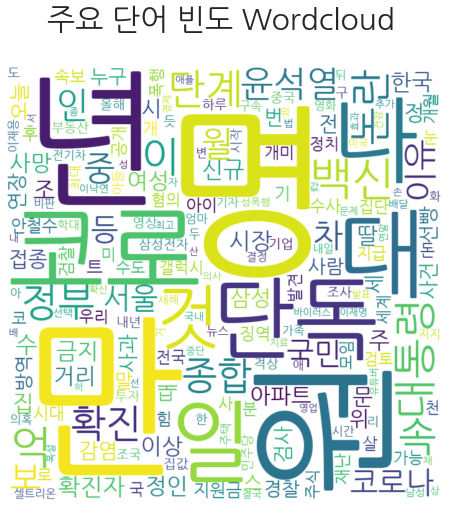

In [8]:
import matplotlib.font_manager as fm
#Read Data
original_dat = pd.read_csv('./results_crawl.csv')

original_dat.values

okt = Okt()
mecab = Mecab()
khaiii_api = khaiii.KhaiiiApi()

main_topic = original_dat['title'].tolist()

main_topic_morphs = list(itertools.chain(*[okt.morphs(x) for x in main_topic]))
main_topic_morphs_khaiii = list(itertools.chain(*[khaiii_morphs(khaiii_api, x) for x in main_topic]))
main_topic_nouns = list(itertools.chain(*[okt.morphs(x) for x in main_topic]))
main_topic_nouns_khaiii = list(itertools.chain(*[khaiii_nouns(khaiii_api, x) for x in main_topic]))

main_counter = Counter()
main_counter.update(main_topic_nouns_khaiii)

main_top_list = top_k_words(main_counter, 0.2)

wordcloud = WordCloud(
    font_path = './fonts/NanumGothic.ttf',
    width = 700,
    height = 700,
    background_color="white",
)

wordcloud = wordcloud.generate_from_frequencies({k: v for k, v in main_top_list})
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=30)
plt.figure(figsize=(8, 8))
plt.title('주요 단어 빈도 Wordcloud \n', fontproperties=fontprop)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/yeongju/.local/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'